# ***important libraries***

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ***Data Manipulation***

In [241]:
data = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# ***EDA***

In [242]:
data.shape

(374, 13)

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [244]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
369    False
370    False
371    False
372    False
373    False
Length: 374, dtype: bool

In [245]:
data.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [246]:
data.dropna(inplace = True)

In [247]:
data.drop_duplicates(inplace = True)

In [248]:
data.drop('Person ID',axis=1)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
16,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# ***Statistics Data***

In [249]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,244.761290,46.632258,6.812258,6.870968,60.896774,5.767742,71.787097,6765.806452
std,91.282997,7.839311,0.773534,1.337325,20.634158,1.946757,5.187381,1893.921881
min,4.000000,28.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,199.500000,43.000000,6.300000,6.000000,45.000000,4.000000,68.000000,6000.000000
50%,255.000000,45.000000,6.500000,7.000000,45.000000,7.000000,72.000000,6000.000000
75%,304.500000,51.000000,7.400000,8.000000,75.000000,7.000000,75.000000,7000.000000
max,374.000000,59.000000,8.300000,9.000000,90.000000,8.000000,86.000000,10000.000000


# ***Unique values***

In [250]:
data['Gender'].value_counts()

Gender
Female    103
Male       52
Name: count, dtype: int64

In [251]:
data['BMI Category'].value_counts()

BMI Category
Overweight       129
Normal            12
Obese             10
Normal Weight      4
Name: count, dtype: int64

In [253]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [254]:
gender = {'Female':0, 'Male':1}
data['Gender'] = data['Gender'].map(gender)

In [255]:
category = {'Overweight':0, 'Normal':1, 'Obese':2, 'Normal Weight':3}
data['BMI Category'] = data['BMI Category'].map(category)

In [256]:
sleep = {'Sleep Apnea':0, 'Insomnia':1}
data['Sleep Disorder'] = data['Sleep Disorder'].map(sleep)

In [257]:
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,4,1,28,Sales Representative,5.9,4,30,8,2,140/90,85,3000,0
4,5,1,28,Sales Representative,5.9,4,30,8,2,140/90,85,3000,0
5,6,1,28,Software Engineer,5.9,4,30,8,2,140/90,85,3000,1
6,7,1,29,Teacher,6.3,6,40,7,2,140/90,82,3500,1
16,17,0,29,Nurse,6.5,5,40,7,3,132/87,80,4000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,Nurse,8.1,9,75,3,0,140/95,68,7000,0
370,371,0,59,Nurse,8.0,9,75,3,0,140/95,68,7000,0
371,372,0,59,Nurse,8.1,9,75,3,0,140/95,68,7000,0
372,373,0,59,Nurse,8.1,9,75,3,0,140/95,68,7000,0


In [258]:
le = LabelEncoder()
data['Occupation'] = le.fit_transform(data['Occupation'])

In [259]:
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,4,1,28,5,5.9,4,30,8,2,140/90,85,3000,0
4,5,1,28,5,5.9,4,30,8,2,140/90,85,3000,0
5,6,1,28,8,5.9,4,30,8,2,140/90,85,3000,1
6,7,1,29,9,6.3,6,40,7,2,140/90,82,3500,1
16,17,0,29,4,6.5,5,40,7,3,132/87,80,4000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,4,8.1,9,75,3,0,140/95,68,7000,0
370,371,0,59,4,8.0,9,75,3,0,140/95,68,7000,0
371,372,0,59,4,8.1,9,75,3,0,140/95,68,7000,0
372,373,0,59,4,8.1,9,75,3,0,140/95,68,7000,0


In [260]:
le = LabelEncoder()
data['Blood Pressure'] = le.fit_transform(data['Blood Pressure'])

In [261]:
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,4,1,28,5,5.9,4,30,8,2,11,85,3000,0
4,5,1,28,5,5.9,4,30,8,2,11,85,3000,0
5,6,1,28,8,5.9,4,30,8,2,11,85,3000,1
6,7,1,29,9,6.3,6,40,7,2,11,82,3500,1
16,17,0,29,4,6.5,5,40,7,3,7,80,4000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,4,8.1,9,75,3,0,12,68,7000,0
370,371,0,59,4,8.0,9,75,3,0,12,68,7000,0
371,372,0,59,4,8.1,9,75,3,0,12,68,7000,0
372,373,0,59,4,8.1,9,75,3,0,12,68,7000,0


# ***Feature Engineering***

In [ ]:
#data['healthy style'] = data['Physical Activity Level'] + data['Stress Level'] + data['Blood Pressure'] + data['Heart Rate']

In [ ]:
#data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,healthy style
3,4,1,28,5,5.9,4,30,8,2,11,85,3000,0,134
4,5,1,28,5,5.9,4,30,8,2,11,85,3000,0,134
5,6,1,28,8,5.9,4,30,8,2,11,85,3000,1,134
6,7,1,29,9,6.3,6,40,7,2,11,82,3500,1,140
16,17,0,29,4,6.5,5,40,7,3,7,80,4000,0,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,4,8.1,9,75,3,0,12,68,7000,0,158
370,371,0,59,4,8.0,9,75,3,0,12,68,7000,0,158
371,372,0,59,4,8.1,9,75,3,0,12,68,7000,0,158
372,373,0,59,4,8.1,9,75,3,0,12,68,7000,0,158


# ***Data visualization***

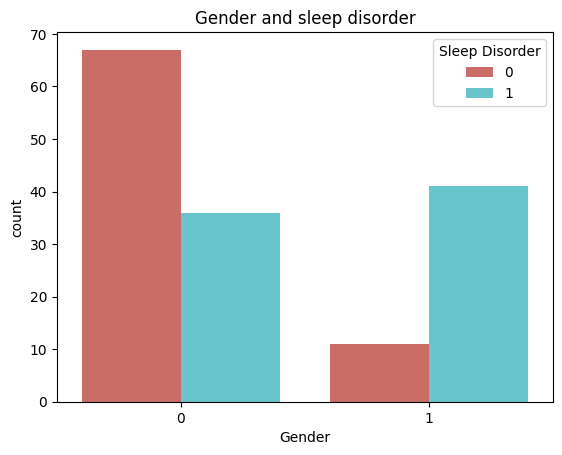

In [262]:
sns.countplot(x = 'Gender', data = data, palette='hls', hue= 'Sleep Disorder').set_title('Gender and sleep disorder')
plt.show()

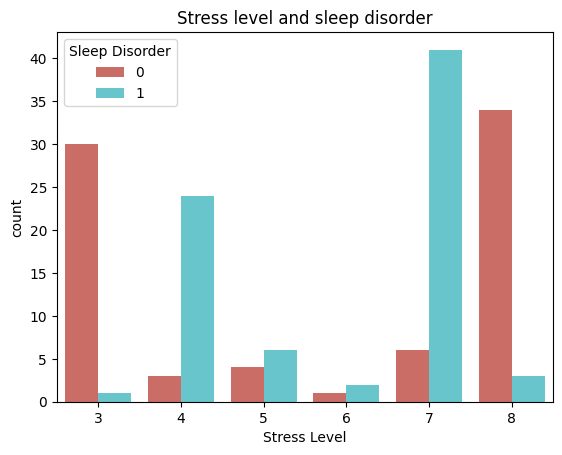

In [263]:
sns.countplot(x = 'Stress Level', data = data, palette='hls', hue= 'Sleep Disorder').set_title('Stress level and sleep disorder')
plt.show()


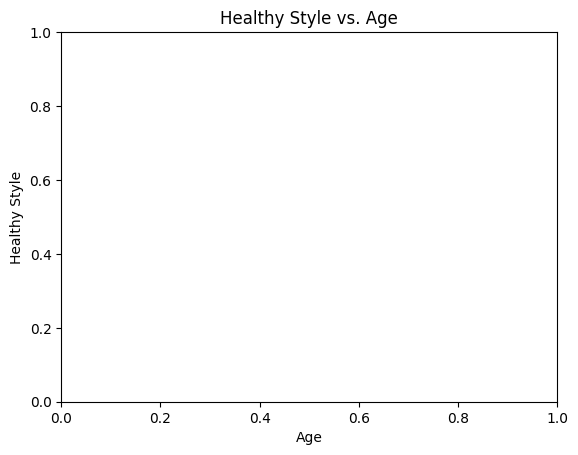

In [231]:
#sns.lineplot(x='Age', y='healthy style', data=data)
plt.title('Healthy Style vs. Age')
plt.xlabel('Age')
plt.ylabel('Healthy Style')
plt.show()


# ***Splitting the data***

In [264]:
x = data.iloc[:, :12]
x

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
3,4,1,28,5,5.9,4,30,8,2,11,85,3000
4,5,1,28,5,5.9,4,30,8,2,11,85,3000
5,6,1,28,8,5.9,4,30,8,2,11,85,3000
6,7,1,29,9,6.3,6,40,7,2,11,82,3500
16,17,0,29,4,6.5,5,40,7,3,7,80,4000
...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,4,8.1,9,75,3,0,12,68,7000
370,371,0,59,4,8.0,9,75,3,0,12,68,7000
371,372,0,59,4,8.1,9,75,3,0,12,68,7000
372,373,0,59,4,8.1,9,75,3,0,12,68,7000


In [265]:
y = data.iloc[: , 12:13]
y

,Sleep Disorder
3,0
4,0
5,1
6,1
16,0
...,...
369,0
370,0
371,0
372,0


In [266]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

# ***Scaling Data***

In [267]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)



# ***Modeling***

In [268]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [269]:
model.score(x_test, y_test)

0.9354838709677419

In [ ]:
model.predict(x_test)

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0])

# ***The Artificial Network***

In [270]:
model = Sequential([
    Dense(units = 8, activation= 'relu'),
    Dense(units = 8, activation= 'relu'),
    Dense(units =1, activation = 'sigmoid')


])

In [271]:
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [272]:
model.fit(x_train, y_train, batch_size=20, epochs =30)

Epoch 1/30
7/7 [==============================] - 2s 4ms/step - loss: 237.3232 - accuracy: 0.5242
Epoch 2/30
7/7 [==============================] - 0s 3ms/step - loss: 210.1042 - accuracy: 0.5242
Epoch 3/30
7/7 [==============================] - 0s 3ms/step - loss: 184.6598 - accuracy: 0.5242
Epoch 4/30
7/7 [==============================] - 0s 4ms/step - loss: 162.6726 - accuracy: 0.5242
Epoch 5/30
7/7 [==============================] - 0s 3ms/step - loss: 141.4613 - accuracy: 0.5242
Epoch 6/30
7/7 [==============================] - 0s 3ms/step - loss: 121.9056 - accuracy: 0.5242
Epoch 7/30
7/7 [==============================] - 0s 3ms/step - loss: 104.6541 - accuracy: 0.5242
Epoch 8/30
7/7 [==============================] - 0s 3ms/step - loss: 87.4880 - accuracy: 0.5242
Epoch 9/30
7/7 [==============================] - 0s 4ms/step - loss: 71.2179 - accuracy: 0.5242
Epoch 10/30
7/7 [==============================] - 0s 4ms/step - loss: 58.4434 - accuracy: 0.5242
Epoch 11/30
7/7 [=====